In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import json
import datetime
# Setting this option will print all collumns of a dataframe
pd.set_option('display.max_columns', None)
# Setting this option will print all of the data in a feature
pd.set_option('display.max_colwidth', None)

C:\Users\R2\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\R2\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\R2\anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In this capstone, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because SpaceX can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against SpaceX for a rocket launch. In this lab, you will collect and make sure the data is in the correct format from an API. The following is an example of a successful and launch.

# Parte 1: extraindo dados da Space X pela api

In [2]:
spacex_url = 'https://api.spacexdata.com/v4/launches/past'

response = requests.get(spacex_url).json()
data = pd.json_normalize(response)
data.head(1)

,static_fire_date_utc,static_fire_date_unix,net,window,rocket,success,failures,details,crew,ships,capsules,payloads,launchpad,flight_number,name,date_utc,date_unix,date_local,date_precision,upcoming,cores,auto_update,tbd,launch_library_id,id,fairings.reused,fairings.recovery_attempt,fairings.recovered,fairings.ships,links.patch.small,links.patch.large,links.reddit.campaign,links.reddit.launch,links.reddit.media,links.reddit.recovery,links.flickr.small,links.flickr.original,links.presskit,links.webcast,links.youtube_id,links.article,links.wikipedia,fairings
0,2006-03-17T00:00:00.000Z,1.142554e+09,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 33, 'altitude': None, 'reason': 'merlin engine failure'}]",Engine failure at 33 seconds and loss of vehicle,[],[],[],[5eb0e4b5b6c3bb0006eeb1e1],5e9e4502f5090995de566f86,1,FalconSat,2006-03-24T22:30:00.000Z,1143239400,2006-03-25T10:30:00+12:00,hour,False,"[{'core': '5e9e289df35918033d3b2623', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",True,False,None,5eb87cd9ffd86e000604b32a,False,False,False,[],https://images2.imgbox.com/94/f2/NN6Ph45r_o.png,https://images2.imgbox.com/5b/02/QcxHUb5V_o.png,None,None,None,None,[],[],None,https://www.youtube.com/watch?v=0a_00nJ_Y88,0a_00nJ_Y88,https://www.space.com/2196-spacex-inaugural-falcon-1-rocket-lost-launch.html,https://en.wikipedia.org/wiki/DemoSat,NaN


In [3]:
data = data[['rocket', 'payloads', 'launchpad', 'cores', 'flight_number', 'date_utc']]
data.head()

,rocket,payloads,launchpad,cores,flight_number,date_utc
0,5e9d0d95eda69955f709d1eb,[5eb0e4b5b6c3bb0006eeb1e1],5e9e4502f5090995de566f86,"[{'core': '5e9e289df35918033d3b2623', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",1,2006-03-24T22:30:00.000Z
1,5e9d0d95eda69955f709d1eb,[5eb0e4b6b6c3bb0006eeb1e2],5e9e4502f5090995de566f86,"[{'core': '5e9e289ef35918416a3b2624', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",2,2007-03-21T01:10:00.000Z
2,5e9d0d95eda69955f709d1eb,"[5eb0e4b6b6c3bb0006eeb1e3, 5eb0e4b6b6c3bb0006eeb1e4]",5e9e4502f5090995de566f86,"[{'core': '5e9e289ef3591814873b2625', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",3,2008-08-03T03:34:00.000Z
3,5e9d0d95eda69955f709d1eb,[5eb0e4b7b6c3bb0006eeb1e5],5e9e4502f5090995de566f86,"[{'core': '5e9e289ef3591855dc3b2626', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",4,2008-09-28T23:15:00.000Z
4,5e9d0d95eda69955f709d1eb,[5eb0e4b7b6c3bb0006eeb1e6],5e9e4502f5090995de566f86,"[{'core': '5e9e289ef359184f103b2627', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",5,2009-07-13T03:35:00.000Z


In [4]:
# removendo colunas com multiplos valores para core e payloads
data = data[data['cores'].map(len)==1]
data = data[data['payloads'].map(len)==1]

#como core e payload estão como lista, deve-se extrair apenas o valor
data['cores'] = data['cores'].map(lambda x: x[0])
data['payloads'] = data['payloads'].map(lambda x: x[0])

#extraindo a data de date_utc
data['date'] = pd.to_datetime(data['date_utc']).dt.date

In [5]:
# restringindo as datas de lancamento
data = data.query('date <= datetime.date(2020,11,13)')

In [6]:
BoosterVersion = []
for x in data['rocket']:
    response = requests.get(f"https://api.spacexdata.com/v4/rockets/{str(x)}").json()
    BoosterVersion.append(response['name'])

In [7]:
pd.DataFrame(BoosterVersion).value_counts()

Falcon 9    90
Falcon 1     4
dtype: int64

In [8]:
LaunchSite = []
Longitude = []
Latitude = []

for x in data['launchpad']:
    if x:
        response = requests.get(f"https://api.spacexdata.com/v4/launchpads/{str(x)}").json()
        LaunchSite.append(response['name'])
        Longitude.append(response['longitude'])

        Latitude.append(response['latitude'])

In [9]:
PayloadMass = []
Orbit = []
for x in data['payloads']:
    if x:
        response = requests.get(f"https://api.spacexdata.com/v4/payloads/{str(x)}").json()
        PayloadMass.append(response['mass_kg'])
        Orbit.append(response['orbit'])

In [10]:
Block = []
ReusedCount = []
Serial = []
Outcome = []
Flights = []
GridFins = []
Reused = []
Legs = []
LandingPad = []

for core in data['cores']:
    if core['core'] != None:
        response = requests.get(f"https://api.spacexdata.com/v4/cores/{core['core']}").json()
        Block.append(response['block'])
        ReusedCount.append(response['reuse_count'])
        Serial.append(response['serial'])
    else:
        Block.append(None)
        ReusedCount.append(None)
        Serial.append(None)
        
    Outcome.append(str(core['landing_success'])+' '+str(core['landing_type']))
    Flights.append(core['flight'])
    GridFins.append(core['gridfins'])
    Reused.append(core['reused'])
    Legs.append(core['legs'])
    LandingPad.append(core['landpad'])

In [11]:
launch_dict = {
    'FlightNumber': list(data['flight_number']),
'Date': list(data['date']),
'BoosterVersion':BoosterVersion,
'PayloadMass':PayloadMass,
'Orbit':Orbit,
'LaunchSite':LaunchSite,
'Outcome':Outcome,
'Flights':Flights,
'GridFins':GridFins,
'Reused':Reused,
'Legs':Legs,
'LandingPad':LandingPad,
'Block':Block,
'ReusedCount':ReusedCount,
'Serial':Serial,
'Longitude': Longitude,
'Latitude': Latitude}

In [12]:
df = pd.DataFrame(launch_dict)
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2006-03-24,Falcon 1,20.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin1A,167.743129,9.047721
1,2,2007-03-21,Falcon 1,NaN,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin2A,167.743129,9.047721
2,4,2008-09-28,Falcon 1,165.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin2C,167.743129,9.047721
3,5,2009-07-13,Falcon 1,200.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin3C,167.743129,9.047721
4,6,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0003,-80.577366,28.561857


In [13]:
#filtrando para apenas para o Falcon 9
df = df.query('BoosterVersion == "Falcon 9"')

In [14]:
df.isnull().sum()

FlightNumber       0
Date               0
BoosterVersion     0
PayloadMass        5
Orbit              0
LaunchSite         0
Outcome            0
Flights            0
GridFins           0
Reused             0
Legs               0
LandingPad        26
Block              0
ReusedCount        0
Serial             0
Longitude          0
Latitude           0
dtype: int64

In [15]:
#preenchendo os valores nulos com a media 
df['PayloadMass'] = df['PayloadMass'].fillna(df['PayloadMass'].mean())

In [16]:
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
4,6,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0003,-80.577366,28.561857
5,8,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0005,-80.577366,28.561857
6,10,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0007,-80.577366,28.561857
7,11,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,None,1.0,0,B1003,-120.610829,34.632093
8,12,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B1004,-80.577366,28.561857


In [17]:
df.to_csv('dataset_part1.csv', index=False)

# Parte 2: extraindo mais dados do Falcon 9 pela wikipedia

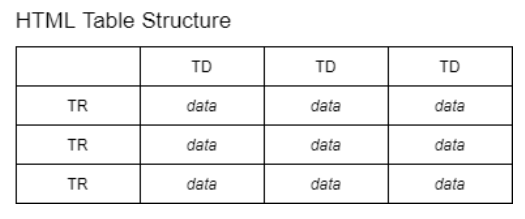

In [18]:
url = 'https://en.wikipedia.org/w/index.php?title=List_of_Falcon_9_and_Falcon_Heavy_launches&oldid=1027686922'

response = requests.get(url).text
soup = BeautifulSoup(response, 'html.parser')

In [19]:
soup.title

<title>List of Falcon 9 and Falcon Heavy launches - Wikipedia</title>

In [20]:
html_tables = soup.find_all('table')
len(html_tables)

24

In [21]:
first_launch_table = html_tables[2]
first_launch_table.tbody.find_all('th')

[<th scope="col">Flight No.
 </th>,
 <th scope="col">Date and<br/>time (<a href="/wiki/Coordinated_Universal_Time" title="Coordinated Universal Time">UTC</a>)
 </th>,
 <th scope="col"><a href="/wiki/List_of_Falcon_9_first-stage_boosters" title="List of Falcon 9 first-stage boosters">Version,<br/>Booster</a> <sup class="reference" id="cite_ref-booster_11-0"><a href="#cite_note-booster-11">[b]</a></sup>
 </th>,
 <th scope="col">Launch site
 </th>,
 <th scope="col">Payload<sup class="reference" id="cite_ref-Dragon_12-0"><a href="#cite_note-Dragon-12">[c]</a></sup>
 </th>,
 <th scope="col">Payload mass
 </th>,
 <th scope="col">Orbit
 </th>,
 <th scope="col">Customer
 </th>,
 <th scope="col">Launch<br/>outcome
 </th>,
 <th scope="col"><a href="/wiki/Falcon_9_first-stage_landing_tests" title="Falcon 9 first-stage landing tests">Booster<br/>landing</a>
 </th>,
 <th rowspan="2" scope="row" style="text-align:center;">1
 </th>,
 <th rowspan="2" scope="row" style="text-align:center;">2
 </th>,
 <

In [22]:
def extract_column_from_header(row):
    if (row.br):
        row.br.extract()
    if row.a:
        row.a.extract()
    if row.sup:
        row.sup.extract()
        
    colunm_name = ' '.join(row.contents)
    if not(colunm_name.strip().isdigit()):
        colunm_name = colunm_name.strip()
        return colunm_name    

# colunas da tabela:
column_names = []

for row in first_launch_table.find_all('th'):
    column_name = extract_column_from_header(row)
    if column_name != None and len(column_name) > 0:
        column_names.append(column_name)

column_names


['Flight No.',
 'Date and time ( )',
 'Launch site',
 'Payload',
 'Payload mass',
 'Orbit',
 'Customer',
 'Launch outcome']

In [23]:
# criando dicionario com as colunas extraidas
launch_dict= dict.fromkeys(column_names)

del launch_dict['Date and time ( )']
launch_dict['Flight No.'] = []
launch_dict['Launch site'] = []
launch_dict['Payload'] = []
launch_dict['Payload mass'] = []
launch_dict['Orbit'] = []
launch_dict['Customer'] = []
launch_dict['Launch outcome'] = []
# Adicionando features para igualar aos dados coletados anteriormente
launch_dict['Version Booster']=[]
launch_dict['Booster landing']=[]
launch_dict['Date']=[]
launch_dict['Time']=[]

In [24]:
import unicodedata
extracted_row = 0
# preenchendo os valores dos dicionarios
for table_number, table in enumerate(soup.find_all('table',"wikitable plainrowheaders collapsible")):
    for rows in table.find_all("tr"):
        #verificar se a linha corresponde a um número de lançamento
        if rows.th:
            if rows.th.string:
                flight_number = rows.th.string.strip()
                #True caso positivo
                flag=flight_number.isdigit()
        else:
            #False caso negativo
            flag = False
                
        row = rows.find_all('td')
        if flag:
            #Caso positivo linha será extraida
            extracted_row +=1
            #numero do lançamento
            launch_dict['Flight No.'].append(flight_number)
            
            #data e horario
            date_time_list = [data_time for data_time in list(row[0].strings)][:2]
            date = date_time_list[0].strip(',')
            time = date_time_list[1].strip()
            launch_dict['Date'].append(date)
            launch_dict['Time'].append(time)
            
            #versão
            bv = ''.join([booster_version.strip() for i,booster_version in enumerate(row[1].strings) if i%2==0][0:-1])
            if not bv:
                bv = row[1].a.string
            launch_dict['Version Booster'].append(bv.strip())
            
            #launch site
            launch_site = row[2].a.string
            launch_dict['Launch site'].append(launch_site.strip())
            
            #payload
            payload = row[3].a.string
            launch_dict['Payload'].append(payload.strip())

            mass = row[4].text.strip()
            kg_position = mass.find("kg")
            if kg_position > 0:
                new_mass = mass[:kg_position]
            else:
                new_mass = '0'
            launch_dict['Payload mass'].append(new_mass.strip())

            orbit = row[5].a.string
            launch_dict['Orbit'].append(orbit)            
            
            try:
                customer = row[6].a.string
                launch_dict['Customer'].append(customer.strip())
            except:
                customer = np.nan
                launch_dict['Customer'].append(customer)
            
            launch_outcome = list(row[7].strings)[0]
            launch_dict['Launch outcome'].append(launch_outcome.strip())
            
            booster_landing  = [i for i in row[8].strings][0]
            launch_dict['Booster landing'].append(booster_landing.strip())
            


In [25]:
launch_wiki = pd.DataFrame(launch_dict)
launch_wiki

,Flight No.,Launch site,Payload,Payload mass,Orbit,Customer,Launch outcome,Version Booster,Booster landing,Date,Time
0,1,CCAFS,Dragon Spacecraft Qualification Unit,0,LEO,SpaceX,Success,F9 v1.0B0003.1,Failure,4 June 2010,18:45
1,2,CCAFS,Dragon,0,LEO,NASA,Success,F9 v1.0B0004.1,Failure,8 December 2010,15:43
2,3,CCAFS,Dragon,525,LEO,NASA,Success,F9 v1.0B0005.1,No attempt,22 May 2012,07:44
3,4,CCAFS,SpaceX CRS-1,"4,700",LEO,NASA,Success,F9 v1.0B0006.1,No attempt,8 October 2012,00:35
4,5,CCAFS,SpaceX CRS-2,"4,877",LEO,NASA,Success,F9 v1.0B0007.1,No attempt,1 March 2013,15:10
...,...,...,...,...,...,...,...,...,...,...,...
116,117,CCSFS,Starlink,"15,600",LEO,SpaceX,Success,F9 B5B1051.10,Success,9 May 2021,06:42
117,118,KSC,Starlink,"~14,000",LEO,SpaceX,Success,F9 B5B1058.8,Success,15 May 2021,22:56
118,119,CCSFS,Starlink,"15,600",LEO,SpaceX,Success,F9 B5B1063.2,Success,26 May 2021,18:59
119,120,KSC,SpaceX CRS-22,"3,328",LEO,NASA,Success,F9 B5B1067.1,Success,3 June 2021,17:29


In [26]:
#transformando valores irregulares de massa para transformar para numérico
for i, mass in enumerate(launch_wiki['Payload mass']):
    launch_wiki['Payload mass'][i] = launch_wiki['Payload mass'][i].replace(',','')
    launch_wiki['Payload mass'][i] = launch_wiki['Payload mass'][i].replace('~','')

In [27]:
# retirando valores como: 5000-6000 que não possuiam valor exato
launch_wiki = launch_wiki[launch_wiki['Payload mass'].map(len) <=5]

In [28]:
launch_wiki['Payload mass'] = launch_wiki['Payload mass'].astype('int64')

C:\Users\R2\AppData\Local\Temp\ipykernel_10092\1212758943.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  launch_wiki['Payload mass'] = launch_wiki['Payload mass'].astype('int64')


In [29]:
launch_wiki.to_csv('spacex_web_scraped.csv', index=False)

# Data Wrangling (EDA)

In the data set, there are several different cases where the booster did not land successfully. Sometimes a landing was attempted but failed due to an accident; for example, <code>True Ocean</code> means the mission outcome was successfully  landed to a specific region of the ocean while <code>False Ocean</code> means the mission outcome was unsuccessfully landed to a specific region of the ocean. <code>True RTLS</code> means the mission outcome was successfully  landed to a ground pad <code>False RTLS</code> means the mission outcome was unsuccessfully landed to a ground pad.<code>True ASDS</code> means the mission outcome was successfully landed on  a drone ship <code>False ASDS</code> means the mission outcome was unsuccessfully landed on a drone ship.

In [30]:
df1 = pd.read_csv('dataset_part1.csv')
df1.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,6,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857
1,8,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857
2,10,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857
3,11,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093
4,12,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857


In [31]:
df1.shape

(90, 17)

In [32]:
#quantidade de amostras nulas
df1.isnull().sum()

FlightNumber       0
Date               0
BoosterVersion     0
PayloadMass        0
Orbit              0
LaunchSite         0
Outcome            0
Flights            0
GridFins           0
Reused             0
Legs               0
LandingPad        26
Block              0
ReusedCount        0
Serial             0
Longitude          0
Latitude           0
dtype: int64

In [33]:
#tipo dos dados
df1.dtypes

FlightNumber        int64
Date               object
BoosterVersion     object
PayloadMass       float64
Orbit              object
LaunchSite         object
Outcome            object
Flights             int64
GridFins             bool
Reused               bool
Legs                 bool
LandingPad         object
Block             float64
ReusedCount         int64
Serial             object
Longitude         float64
Latitude          float64
dtype: object

In [34]:
df1['LaunchSite'].value_counts()

CCSFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: LaunchSite, dtype: int64

orbit
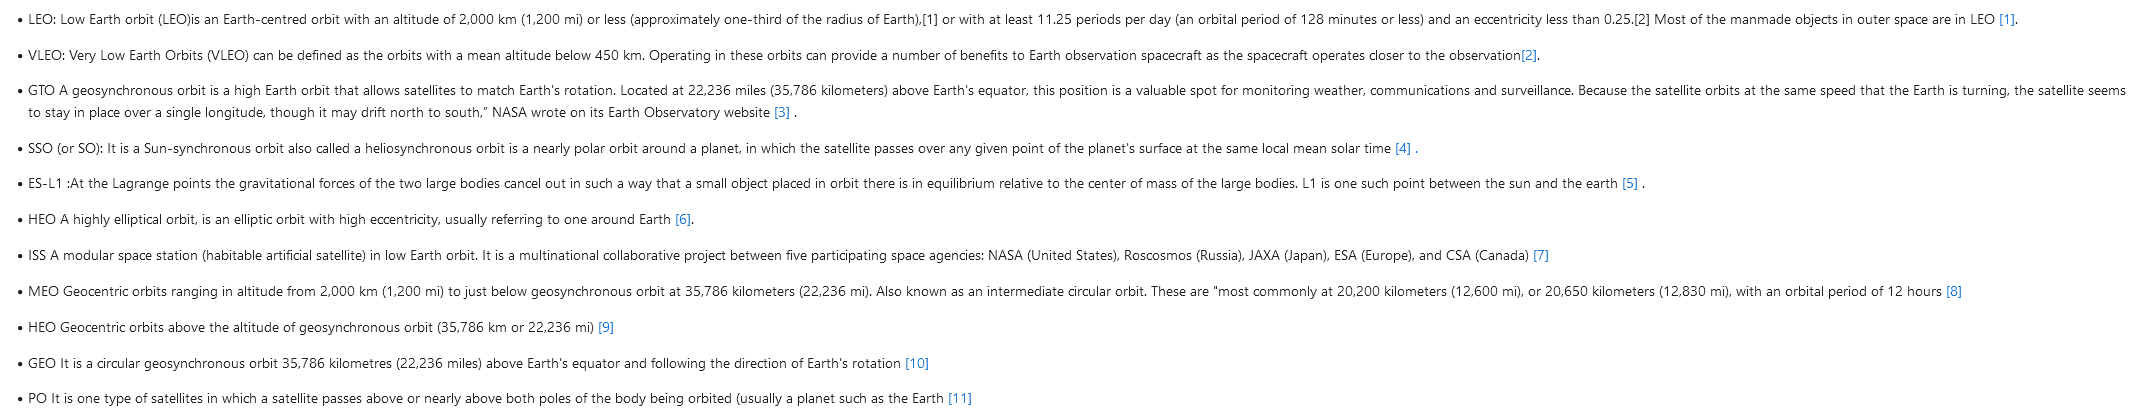

In [35]:
df1['Orbit'].value_counts()

GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
ES-L1     1
HEO       1
SO        1
GEO       1
Name: Orbit, dtype: int64

In [36]:
df1['Outcome'].value_counts()

True ASDS      41
None None      19
True RTLS      14
False ASDS      6
True Ocean      5
False Ocean     2
None ASDS       2
False RTLS      1
Name: Outcome, dtype: int64

In [37]:
bad_outcomes = ['False ASDS', 'False Ocean', 'False RTLS', 'None ASDS', 'None None']
landing_class = []

for i in df['Outcome']:
    if i in(bad_outcomes):
        landing_class.append(0)
    else:
        landing_class.append(1)

In [38]:
df1['Class'] = landing_class
df1

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,6,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,8,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,10,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,11,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,12,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,102,2020-09-03,Falcon 9,15600.000000,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1060,-80.603956,28.608058,1
86,103,2020-10-06,Falcon 9,15600.000000,VLEO,KSC LC 39A,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,13,B1058,-80.603956,28.608058,1
87,104,2020-10-18,Falcon 9,15600.000000,VLEO,KSC LC 39A,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1051,-80.603956,28.608058,1
88,105,2020-10-24,Falcon 9,15600.000000,VLEO,CCSFS SLC 40,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,12,B1060,-80.577366,28.561857,1


In [39]:
df1.groupby('Orbit')['Class'].sum()

Orbit
ES-L1     1
GEO       1
GTO      14
HEO       1
ISS      13
LEO       5
MEO       2
PO        6
SO        0
SSO       5
VLEO     12
Name: Class, dtype: int64

In [40]:
df1['Class'].value_counts(normalize=True)

1    0.666667
0    0.333333
Name: Class, dtype: float64

In [107]:
df1.to_csv('dataset_part2.csv')

# Graphics

In [41]:
df1.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,6,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,8,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,10,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,11,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,12,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


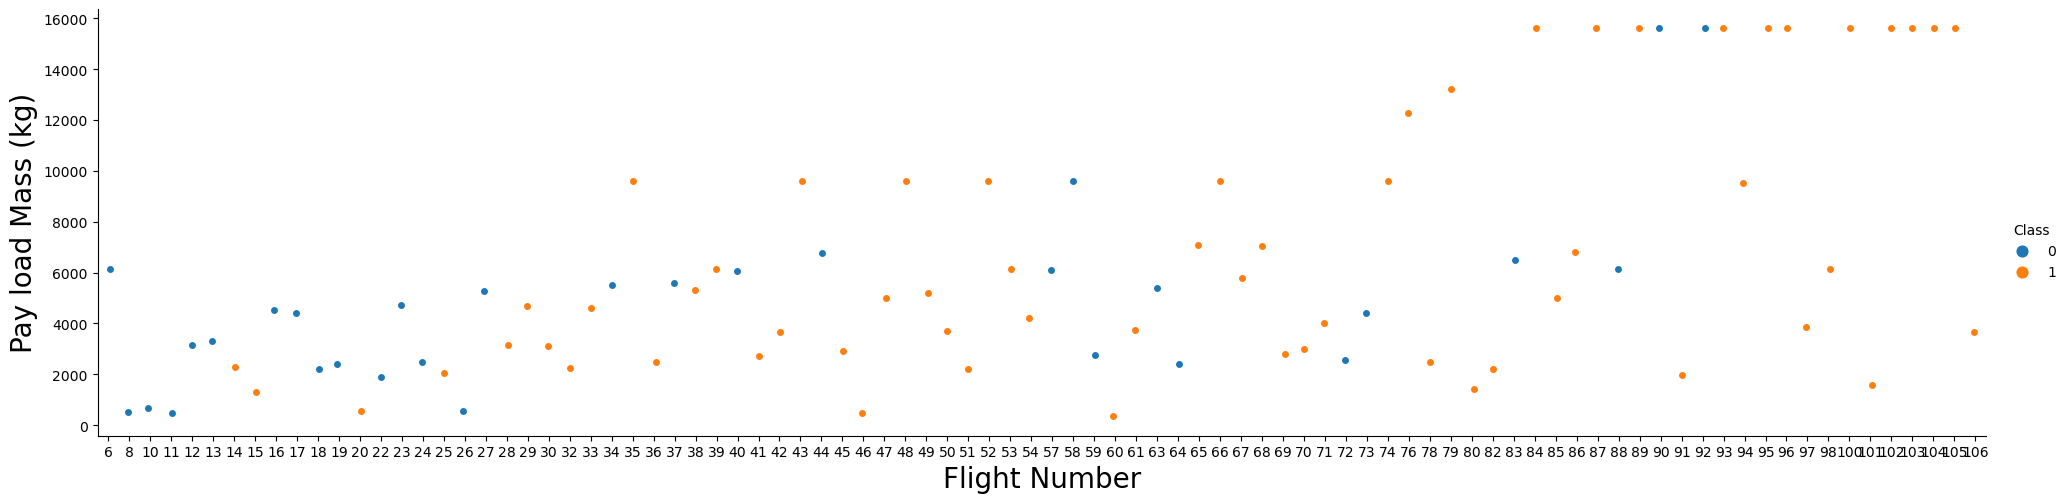

In [42]:
sns.catplot(y='PayloadMass', x='FlightNumber', hue='Class', data=df1, aspect=4)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

<Figure size 2000x800 with 0 Axes>

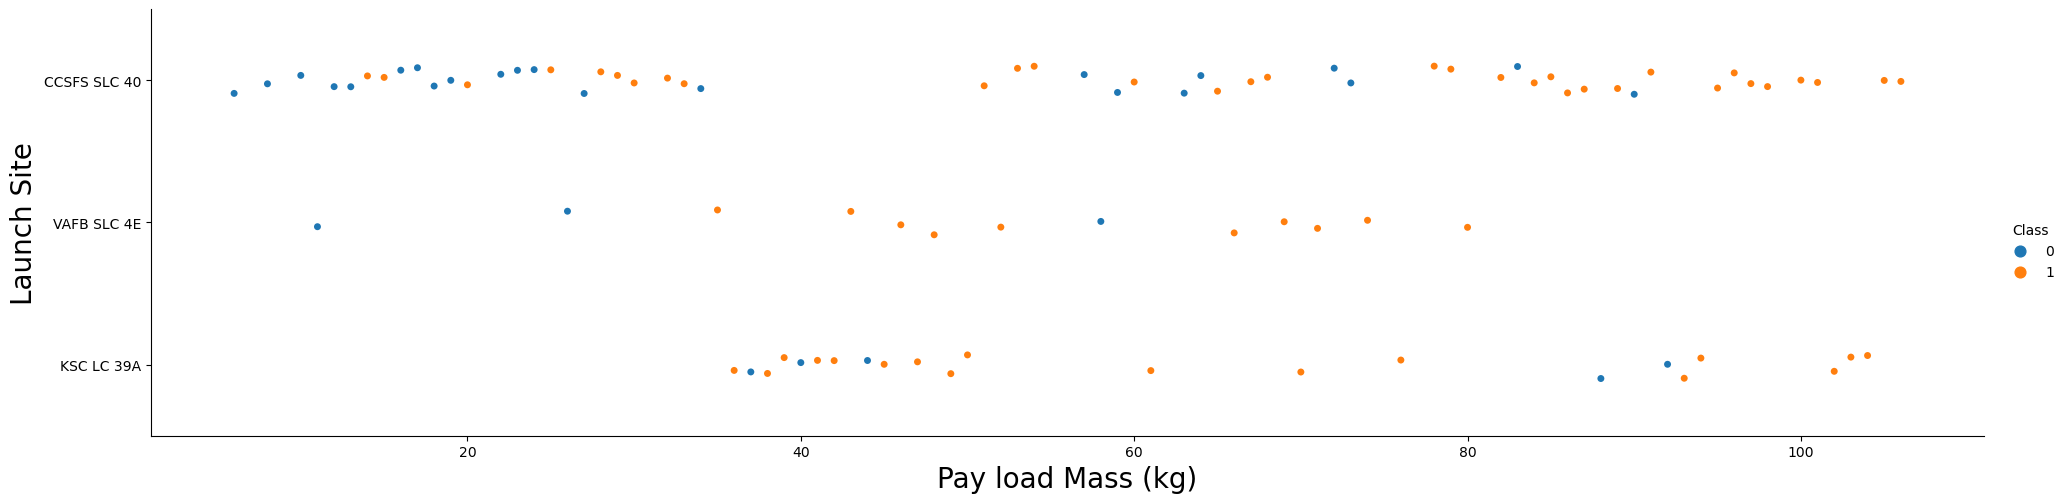

In [43]:
plt.figure(figsize=(20,8))
sns.catplot(y='LaunchSite', x='FlightNumber', hue='Class', data = df1, aspect=4)
plt.ylabel("Launch Site",fontsize=20)
plt.xlabel("Pay load Mass (kg)",fontsize=20)
plt.show()

CCSFS SLC 40 apresentou mais lançamentos

Para valores maiores de pay load mass (kg) o sucesso dos lancamentos foi maior

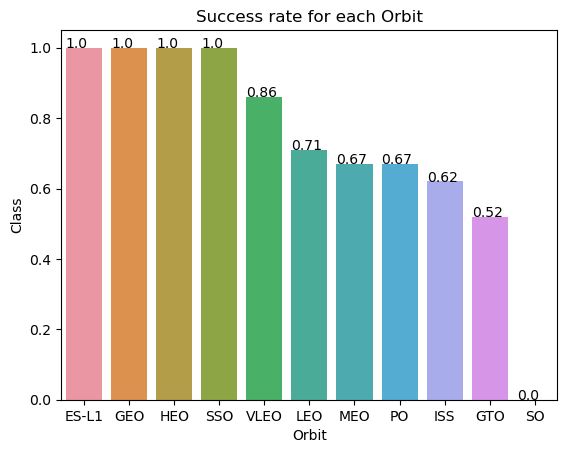

In [44]:
class_orbit = df1.groupby('Orbit').Class.mean()
class_orbit = class_orbit.reset_index()
class_orbit = class_orbit.sort_values(by='Class', ascending=False)
class_orbit = round(class_orbit,2)
ax = sns.barplot(x=class_orbit.Orbit, y=class_orbit.Class)
for p in ax.patches:
    plt.annotate(p.get_height(), xy=(p.get_x(), p.get_height()))
ax.set_title('Success rate for each Orbit')
plt.show()

As orbitas ES-L1, GEO, HEO e SSO apresentaram a maior taxa de sucesso

<Figure size 2000x800 with 0 Axes>

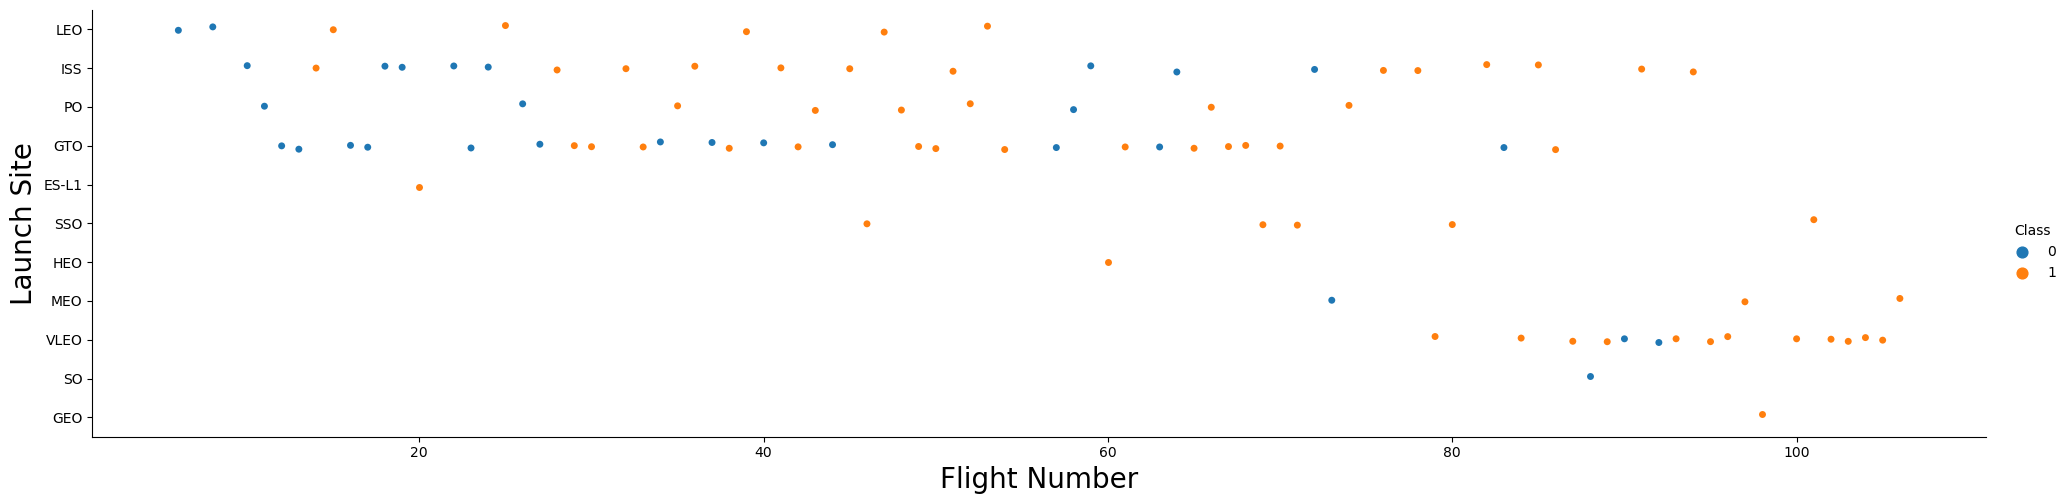

In [45]:
plt.figure(figsize=(20,8))
sns.catplot(y='Orbit', x='FlightNumber', hue='Class', data = df1, aspect=4)
plt.ylabel("Launch Site",fontsize=20)
plt.xlabel("Flight Number",fontsize=20)
plt.show()

In [46]:
df1.Date = pd.to_datetime(df1.Date)

In [47]:
df1['year'] = df1.Date.dt.year

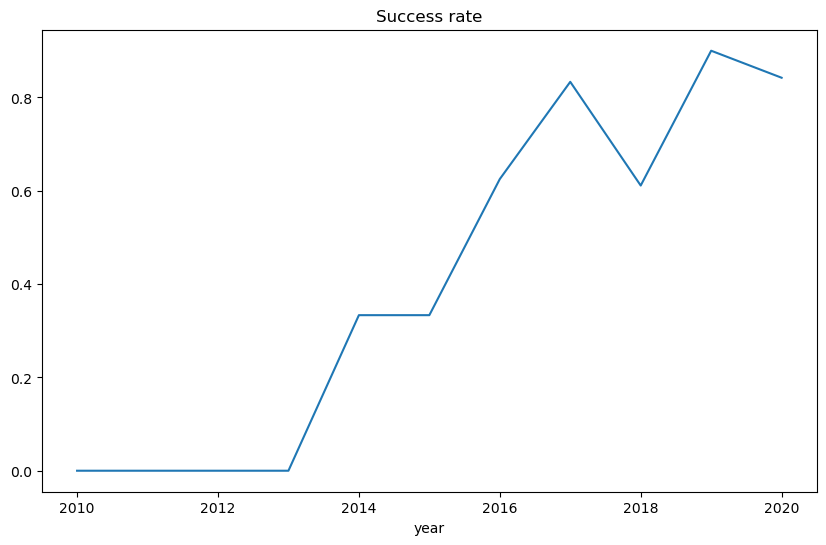

In [48]:
df1.groupby('year')['Class'].mean().plot(kind='line', figsize=(10,6))
plt.title('Success rate')
plt.show()

In [49]:
features = df1[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,6,6123.547647,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,8,525.000000,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,10,677.000000,ISS,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,11,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,12,3170.000000,GTO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [50]:
#variaveis numericas
numerical_features = []
for i in features.columns:
    if features[i].dtype != 'object':
        numerical_features.append(i)
numerical_df = df[numerical_features]
numerical_df

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount
4,6,6123.547647,1,False,False,False,1.0,0
5,8,525.000000,1,False,False,False,1.0,0
6,10,677.000000,1,False,False,False,1.0,0
7,11,500.000000,1,False,False,False,1.0,0
8,12,3170.000000,1,False,False,False,1.0,0
...,...,...,...,...,...,...,...,...
89,102,15600.000000,2,True,True,True,5.0,12
90,103,15600.000000,3,True,True,True,5.0,13
91,104,15600.000000,6,True,True,True,5.0,12
92,105,15600.000000,3,True,True,True,5.0,12


In [51]:
#variaveis categoricas
categorical_features = []
for i in features.columns:
    if features[i].dtype == 'object':
        categorical_features.append(i)
categorical_features

['Orbit', 'LaunchSite', 'LandingPad', 'Serial']

In [52]:
categorical_df = pd.get_dummies(features[categorical_features])

In [53]:
one_hot_df = pd.concat([numerical_df,categorical_df], axis=1)
one_hot_df.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,Orbit_VLEO,LaunchSite_CCSFS SLC 40,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc,Serial_B0003,Serial_B0005,Serial_B0007,Serial_B1003,Serial_B1004,Serial_B1005,Serial_B1006,Serial_B1007,Serial_B1008,Serial_B1010,Serial_B1011,Serial_B1012,Serial_B1013,Serial_B1015,Serial_B1016,Serial_B1017,Serial_B1018,Serial_B1019,Serial_B1020,Serial_B1021,Serial_B1022,Serial_B1023,Serial_B1025,Serial_B1026,Serial_B1028,Serial_B1029,Serial_B1030,Serial_B1031,Serial_B1032,Serial_B1034,Serial_B1035,Serial_B1036,Serial_B1037,Serial_B1038,Serial_B1039,Serial_B1040,Serial_B1041,Serial_B1042,Serial_B1043,Serial_B1044,Serial_B1045,Serial_B1046,Serial_B1047,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
4,6.0,6123.547647,1.0,False,False,False,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,8.0,525.000000,1.0,False,False,False,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,10.0,677.000000,1.0,False,False,False,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,11.0,500.000000,1.0,False,False,False,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,12.0,3170.000000,1.0,False,False,False,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Folium maps

In [54]:
import folium
from folium.plugins import MarkerCluster, MousePosition
from folium.features import DivIcon

In [55]:
spacex_df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_geo.csv')
spacex_df.head()

,Flight Number,Date,Time (UTC),Booster Version,Launch Site,Payload,Payload Mass (kg),Orbit,Customer,Landing Outcome,class,Lat,Long
0,1,2010-06-04,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0.0,LEO,SpaceX,Failure (parachute),0,28.562302,-80.577356
1,2,2010-12-08,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel of Brouère cheese",0.0,LEO (ISS),NASA (COTS) NRO,Failure (parachute),0,28.562302,-80.577356
2,3,2012-05-22,7:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2+,525.0,LEO (ISS),NASA (COTS),No attempt,0,28.562302,-80.577356
3,4,2012-10-08,0:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500.0,LEO (ISS),NASA (CRS),No attempt,0,28.562302,-80.577356
4,5,2013-03-01,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677.0,LEO (ISS),NASA (CRS),No attempt,0,28.562302,-80.577356


In [56]:
spacex_df.columns

Index(['Flight Number', 'Date', 'Time (UTC)', 'Booster Version', 'Launch Site',
       'Payload', 'Payload Mass (kg)', 'Orbit', 'Customer', 'Landing Outcome',
       'class', 'Lat', 'Long'],
      dtype='object')

In [57]:
spacex_position = spacex_df[[ 'Flight Number' , 'Long','Lat','Launch Site','class']]
spacex_position.head()

,Flight Number,Long,Lat,Launch Site,class
0,1,-80.577356,28.562302,CCAFS LC-40,0
1,2,-80.577356,28.562302,CCAFS LC-40,0
2,3,-80.577356,28.562302,CCAFS LC-40,0
3,4,-80.577356,28.562302,CCAFS LC-40,0
4,5,-80.577356,28.562302,CCAFS LC-40,0


In [58]:
spacex_df = spacex_df[['Launch Site', 'Lat', 'Long', 'class']]
launch_sites_df = spacex_df.groupby(['Launch Site'], as_index=False).first()
launch_sites_df = launch_sites_df[['Launch Site', 'Lat', 'Long']]
launch_sites_df

,Launch Site,Lat,Long
0,CCAFS LC-40,28.562302,-80.577356
1,CCAFS SLC-40,28.563197,-80.576820
2,KSC LC-39A,28.573255,-80.646895
3,VAFB SLC-4E,34.632834,-120.610745


In [59]:
nasa_coordinate = [29.559684888503615, -95.0830971930759]
site_map = folium.Map(location=nasa_coordinate, zoom_start=10)

circle = folium.Circle(nasa_coordinate, radius=1000, color='#d35400', fill=True).add_child(folium.Popup('NASA Johnson Space Center'))
marker = folium.map.Marker(nasa_coordinate,
                          icon=DivIcon(
                          icon_size=(20,20),
                          icon_anchor=(0,0),
                          html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % 'NASA JSC'
                          )
                          )
site_map.add_child(circle)
site_map.add_child(marker)

In [60]:
site_map = folium.Map(location=nasa_coordinate, zoom_start=5)

launchs = folium.map.FeatureGroup()

for lat, lng, label in zip(launch_sites_df.Lat, launch_sites_df.Long, launch_sites_df['Launch Site']):
    launchs.add_child(folium.features.CircleMarker(location=[lat,lng],
                                                  radius=5,
                                                  color='red',
                                                  fill=True,
                                                  fill_color='Red',
                                                  popup=label)).add_to(site_map)
site_map

In [61]:
site_map = folium.Map(location=nasa_coordinate, zoom_start=5)

launchs = MarkerCluster().add_to(site_map)

for lat, lng, label in zip(spacex_position.Lat, spacex_position.Long, spacex_position['Launch Site']):    
    folium.Marker(location=[lat,lng],
                 icon=None,
                 popup=label).add_to(launchs)

site_map

In [62]:
spacex_position['marker_color'] = spacex_position['class'].apply(lambda x: 'green' if (x==1) else 'red')
spacex_position.head(20)

,Flight Number,Long,Lat,Launch Site,class,marker_color
0,1,-80.577356,28.562302,CCAFS LC-40,0,red
1,2,-80.577356,28.562302,CCAFS LC-40,0,red
2,3,-80.577356,28.562302,CCAFS LC-40,0,red
3,4,-80.577356,28.562302,CCAFS LC-40,0,red
4,5,-80.577356,28.562302,CCAFS LC-40,0,red
5,7,-80.577356,28.562302,CCAFS LC-40,0,red
6,8,-80.577356,28.562302,CCAFS LC-40,0,red
7,9,-80.577356,28.562302,CCAFS LC-40,0,red
8,10,-80.577356,28.562302,CCAFS LC-40,0,red
9,11,-80.577356,28.562302,CCAFS LC-40,0,red


In [63]:
site_map = folium.Map(location  = nasa_coordinate,
                     zoom_start = 5)

launchs = MarkerCluster().add_to(site_map)

MousePosition(
    position="topright",
    separator=" | ",
    empty_string="NaN",
    lng_first=True,
    num_digits=20,
    prefix="Coordinates:",).add_to(site_map)

for index, record in spacex_position.iterrows():
    folium.Marker(location=[record['Lat'], record['Long']],
                 popup=record['class'],
                 icon = folium.Icon(color=record['marker_color'])).add_to(launchs)

site_map

# Dashboard

In [36]:
%%writefile app.py
import streamlit as st
import pandas as pd
import plotly.express as px

spacex_df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_dash.csv")
spacex_df = spacex_df.rename(columns={'Payload Mass (kg)':"PayloadMass"})

def app_layout():
    st.title("SpaceX Launch Records Dashboard")
    option = st.selectbox("Launch Sites", options = ['All','CCAFS LC-40', 'VAFB SLC-4E', 'KSC LC-39A', 'CCAFS SLC-40'], key='selectbox')
       
    if option == 'All':
        launchsite_success = spacex_df.groupby('Launch Site')[['class']].count().reset_index()
        launchsite_success.columns = ['Launch Site', 'count']
        fig = px.pie(launchsite_success, values='count', names='Launch Site',title='Total Success By Site')
        fig.update_layout(font_size=20)
        st.plotly_chart(fig)
        
    else:
        #filtro do dataset de acordo com a opção escolhida
        specific_site_succes = spacex_df[spacex_df['Launch Site'] == option].groupby('class')[['Launch Site']].count().reset_index()  
        specific_site_succes.columns = ['class', 'count']
        #gerando o grafico em pizza para sucesso individual
        fig2 = px.pie(specific_site_succes, values='count', names='class', title=f'{option} Site success',
                      labels={'0':'a','1':'b'})
        
        fig2.update_layout(font_size=20 )
        #disponibilizando o gráfico
        st.plotly_chart(fig2)
        
    #alternado nome da coluna Payload Mass (kg) para facilitar na manipulação da variável
    min_slider, max_slider = st.slider(label='Payload range (kg)',value=(0,10000), step=1000)
    slider_df = spacex_df.query(f'PayloadMass > {min_slider} and PayloadMass < {max_slider}')
    
    if option == 'All':
        fig3 = px.scatter(slider_df, x='PayloadMass', y='class', color='Booster Version Category')
        st.plotly_chart(fig3)
        
    else:
        fig3 = px.scatter(slider_df, x='PayloadMass', y='class', color='Booster Version Category')
        st.plotly_chart(fig3)        
        
if __name__=='__main__':
    app_layout()

Overwriting app.py


CCAFS LC-40 was the site with more success

2k-6k

k-10k

T